In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from mpl_toolkits import mplot3d



In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/COGS108/group036_fa20/master/Datasets/games-features.csv?token=ARIRPW6NDLFM6GT3UHDXBNC7ZCUJ2')



In [8]:

df = df[['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'SteamSpyOwners']]

df_drop0 = df[df['SteamSpyOwners'] > 0]
df_log=df_drop0
df_log['log_owners'] = np.log(df_drop0['SteamSpyOwners'])
df_log

df['log_owners'] = np.log(df['SteamSpyOwners'])
df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,SteamSpyOwners,log_owners
0,False,True,False,False,False,False,False,False,13033334,16.383021
1,False,True,False,False,False,False,False,False,5399140,15.501750
2,False,True,False,False,False,False,False,False,7621102,15.846432
3,False,True,False,False,False,False,False,False,7498965,15.830276
4,True,True,False,False,False,False,False,False,5399499,15.501817


In [16]:
df=df*1
list_col=[]
for i in ['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport']:
    list_col.append(sum(df[i]))
    
df_cat = pd.DataFrame(list_col,columns=['Category']) 
df_cat['category_name']=['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport']

df_cat.set_index('category_name')  
    

,Category
category_name,
CategorySinglePlayer,11687
CategoryMultiplayer,3481
CategoryCoop,1334
CategoryMMO,323
CategoryInAppPurchase,173
CategoryIncludeSrcSDK,27
CategoryIncludeLevelEditor,634
CategoryVRSupport,237


<Figure size 432x288 with 0 Axes>

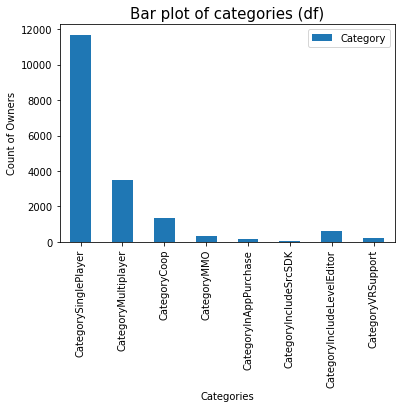

In [24]:
plt.figure();

df_cat.plot.bar(x='category_name')
plt.title('Bar plot of categories (df)', fontsize = 15)
plt.xlabel('Categories')
plt.ylabel('Count of Owners')
plt.show()

In [25]:
df_log=df_log*1
list_col=[]
for i in ['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport']:
    list_col.append(sum(df_log[i]))
    
df_cat = pd.DataFrame(list_col,columns=['Category']) 
df_cat['category_name']=['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport']

df_cat.set_index('category_name') 

,Category
category_name,
CategorySinglePlayer,9856
CategoryMultiplayer,2993
CategoryCoop,1126
CategoryMMO,283
CategoryInAppPurchase,152
CategoryIncludeSrcSDK,24
CategoryIncludeLevelEditor,552
CategoryVRSupport,194


<Figure size 432x288 with 0 Axes>

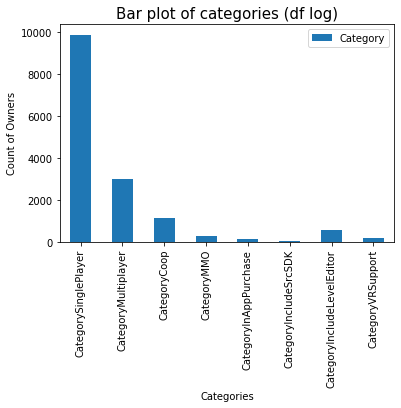

In [26]:
plt.figure();

df_cat.plot.bar(x='category_name')
plt.title('Bar plot of categories (df log)', fontsize = 15)
plt.xlabel('Categories')
plt.ylabel('Count of Owners')
plt.show()

In [27]:
df_drop0=df_drop0*1
list_col=[]
for i in ['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport']:
    list_col.append(sum(df_drop0[i]))
    
df_cat = pd.DataFrame(list_col,columns=['Category']) 
df_cat['category_name']=['CategorySinglePlayer', 'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO', 'CategoryInAppPurchase', 'CategoryIncludeSrcSDK', 'CategoryIncludeLevelEditor', 'CategoryVRSupport']

df_cat.set_index('category_name') 

,Category
category_name,
CategorySinglePlayer,9856
CategoryMultiplayer,2993
CategoryCoop,1126
CategoryMMO,283
CategoryInAppPurchase,152
CategoryIncludeSrcSDK,24
CategoryIncludeLevelEditor,552
CategoryVRSupport,194


<Figure size 432x288 with 0 Axes>

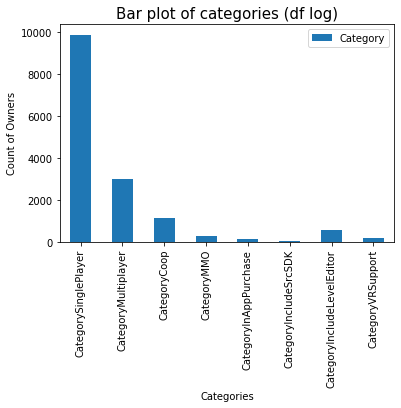

In [28]:
plt.figure();

df_cat.plot.bar(x='category_name')
plt.title('Bar plot of categories (df log)', fontsize = 15)
plt.xlabel('Categories')
plt.ylabel('Count of Owners')
plt.show()

In [29]:
def createCate_str(df):
    df['Category_str'] = ''
    
    if df['CategorySinglePlayer']:
        df['Category_str'] = df['Category_str'] + ' S'
    if df['CategoryMultiplayer']:
        df['Category_str'] = df['Category_str'] + ' M'
    if df['CategoryCoop']:
        df['Category_str'] = df['Category_str'] + ' C'
    if df['CategoryMMO']:
        df['Category_str'] = df['Category_str'] + ' O'
    if df['CategoryInAppPurchase']:
        df['Category_str'] = df['Category_str'] + ' P'
    if df['CategoryIncludeSrcSDK']:
        df['Category_str'] = df['Category_str'] + ' K'
    if df['CategoryIncludeLevelEditor']:
        df['Category_str'] = df['Category_str'] + ' E'
    if df['CategoryVRSupport']:
        df['Category_str'] = df['Category_str'] + ' V'
    return df



In [30]:
df = df.apply(createCate_str, axis=1) 
df_drop0 = df_drop0.apply(createCate_str, axis=1) 
df_log = df_log.apply(createCate_str, axis=1) 
df['Category_str'].value_counts()

 S          8227
 S M        1588
             996
 S M C       812
 M           271
            ... 
 E V           1
 M O V         1
 M C P E       1
 S M K E       1
 S O P         1
Name: Category_str, Length: 77, dtype: int64

In [31]:
df.head()

,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,SteamSpyOwners,log_owners,Category_str
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13033334.0,16.383021,M
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5399140.0,15.501750,M
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7621102.0,15.846432,M
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,7498965.0,15.830276,M
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5399499.0,15.501817,S M


In [32]:
outcome, predictors = patsy.dmatrices('log_owners ~ CategorySinglePlayer', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())



                            OLS Regression Results                            
Dep. Variable:             log_owners   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 26 Nov 2020   Prob (F-statistic):                nan
Time:                        09:54:44   Log-Likelihood:                    nan
No. Observations:               13357   AIC:                               nan
Df Residuals:                   13355   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                  -inf 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1594: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
